In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

SETUP COLUMNS AND LOAD IN DATASET

In [2]:
cols = ['fLength', 'fWidth','fSize','fConc','fConc1','fAsym','fM3long','fm3Trans','fAlpha','fDist','class']
df = pd.read_csv('magic04.data',names=cols)

In [3]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3long,fm3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3long   19020 non-null  float64
 7   fm3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


CONVERT CLASS COLUMN TO INTEGER VALUE(GAMMA=1,HADRON=0)

In [6]:
df['class'] = (df['class']=='g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3long,fm3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


PLOT HISTOGRAMS TO SEE RELATIONSHIP BETWEEN FEATURES AND TARGET

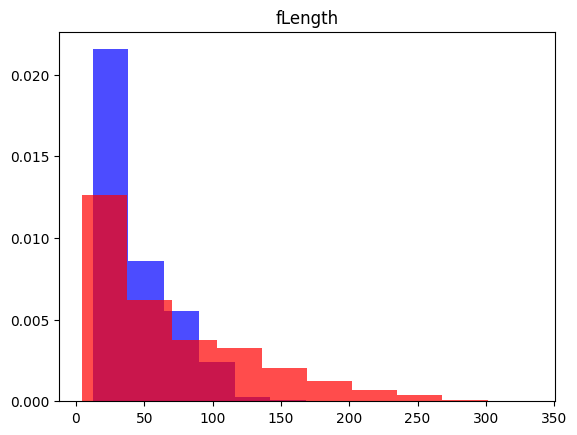

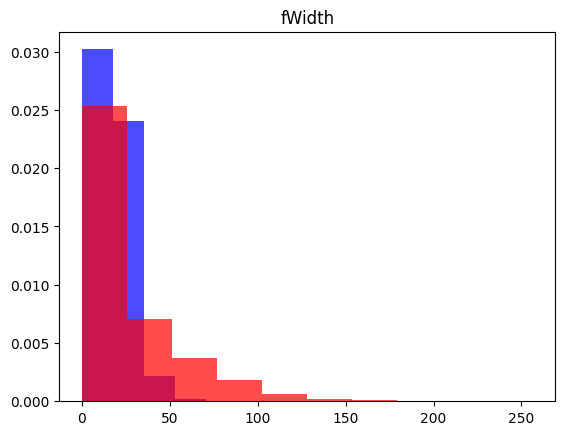

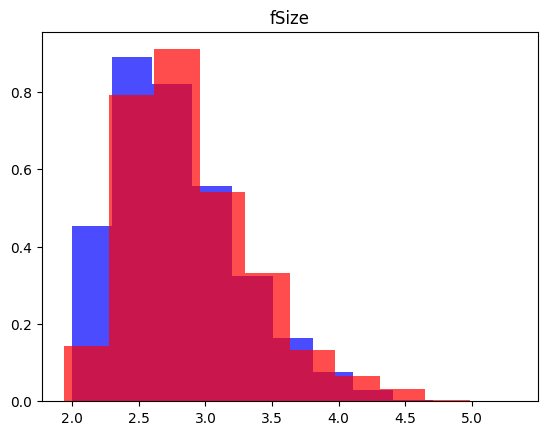

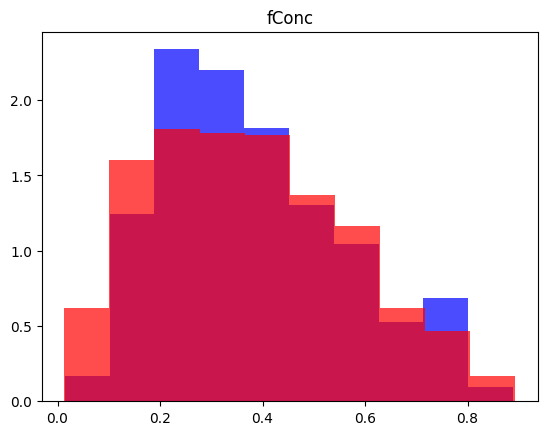

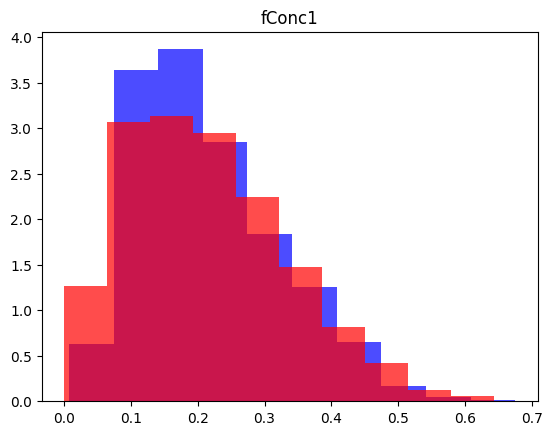

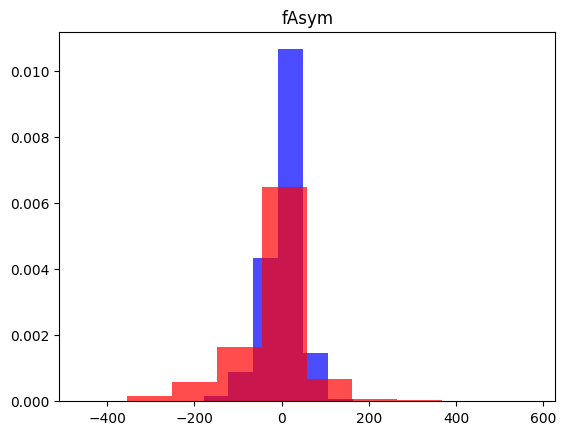

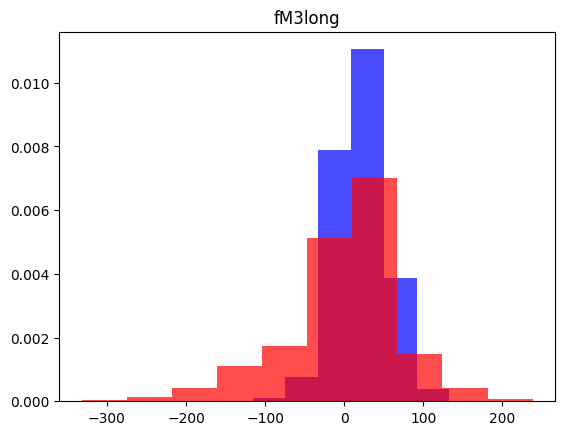

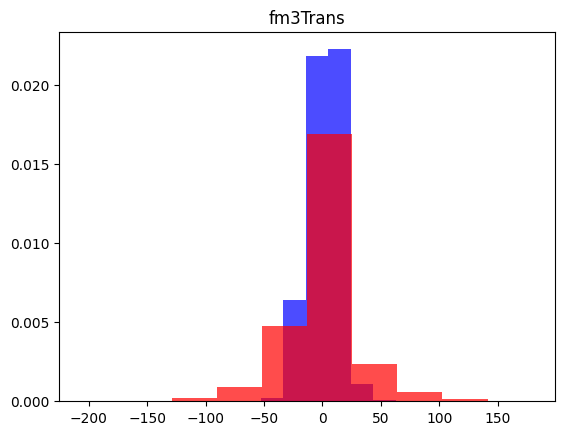

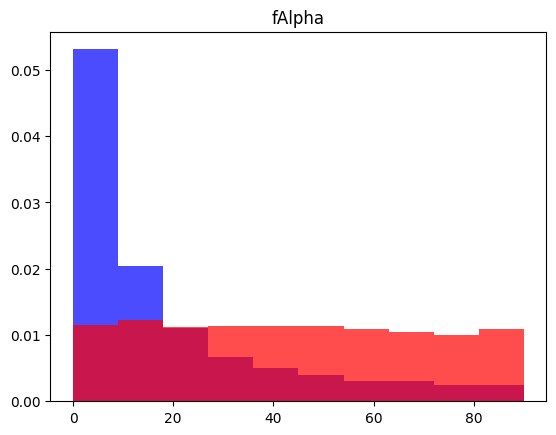

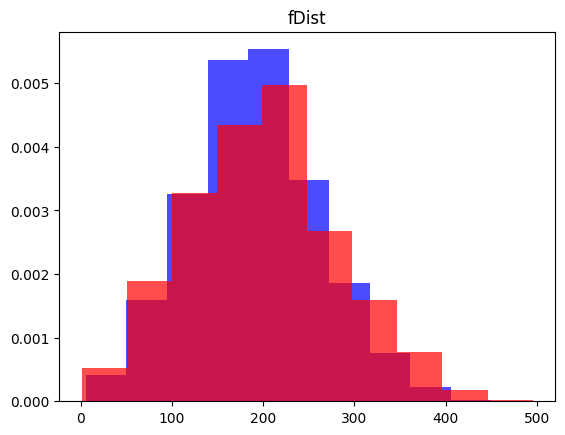

In [10]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    
    plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)

    plt.title(label)
    plt.show()


In [11]:
#Training and testing datasets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
features = df.drop('class',axis=1)
target = df['class']

In [14]:
features.shape

(19020, 10)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2)

In [17]:
X_train.shape

(15216, 10)

SCALE THE DATA TO INCREASE ACCURACY OF THE MODEL 

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

x_scaled_train = scaler.fit_transform(X_train)

In [23]:
x_scaled_train

array([[-0.49424326, -0.50692283, -1.00987255, ..., -0.29467268,
        -0.508631  ,  0.29143191],
       [ 0.39970174, -0.41244287, -0.67476331, ...,  0.49401637,
         1.00105037, -1.82721331],
       [ 0.4736784 , -0.18739825, -0.81033216, ..., -0.75491446,
        -1.02085669,  0.44544594],
       ...,
       [-0.3166757 , -0.15924871,  0.423768  , ...,  0.306276  ,
        -0.71889364,  0.28880857],
       [ 0.59864086, -0.29158998,  0.38330917, ..., -0.55854489,
        -0.97332929,  0.53030289],
       [-0.67914132, -0.40155029, -0.58600808, ...,  0.39934469,
        -0.58824494,  0.3377017 ]])

DEFINE A K NEAREST NEIGHBORS MODEL

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(x_scaled_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
x_scaled_test = scaler.transform(X_test)



In [28]:
x_scaled_test

array([[-0.76730755, -0.50564453, -1.14035757, ...,  0.35191287,
        -0.49048216, -0.01264776],
       [-0.87318009, -0.57692563, -1.13802748, ..., -0.34878517,
        -0.64687965, -0.79380017],
       [-0.35248903, -0.31060189, -0.94801926, ..., -0.47621711,
         0.72351271, -0.8097142 ],
       ...,
       [-0.82881531, -0.6482284 , -0.88298858, ...,  0.27484516,
        -0.13551456, -0.73007715],
       [ 1.16403613,  1.63103358,  2.58736205, ..., -0.87875169,
         0.88944934, -0.19242404],
       [ 0.52347152, -0.421613  ,  0.03845592, ...,  0.67712058,
         0.52638838, -1.72034574]])

In [29]:
pred = knn.predict(x_scaled_test)

In [30]:
pred

array([1, 1, 1, ..., 1, 0, 0])

In [31]:
y_test

11891    1
12218    1
3221     1
3711     1
12068    1
        ..
12563    0
6101     1
9559     1
14073    0
17377    0
Name: class, Length: 3804, dtype: int32

In [32]:
knn.score(x_scaled_test,y_test)

0.8154574132492114

In [33]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.67      0.72      1347\n           1       0.83      0.89      0.86      2457\n\n    accuracy                           0.82      3804\n   macro avg       0.80      0.78      0.79      3804\nweighted avg       0.81      0.82      0.81      3804\n'

OUR MODEL HAD AN ACCURACY OF 81% WHICH IS DECENT